# Data Quality Report on Final Base Table For Modelling

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [48]:
df = pd.read_csv('../datasets/final_table_model.csv')

C:\Users\pamel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df.head()

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,10001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,10001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,10001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,10001,264,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,10001,439,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [50]:
df.shape

(16852100, 12)

In [51]:
df.tail(3)

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
16852097,084X1002,23071,3197,2013-01-29 09:07:03,9,Tuesday,0,am,7.38,0.03,8.32,10.88
16852098,084X1002,23318,3303,2013-01-29 09:08:49,9,Tuesday,0,am,7.38,0.03,8.32,10.88
16852099,084X1002,23665,3478,2013-01-29 09:11:44,9,Tuesday,0,am,7.38,0.03,8.32,10.88


In [52]:
df.dtypes

Journey_Pattern_ID     object
Distance                int64
Trip_Time               int64
datetime               object
HourOfDay               int64
day_of_week            object
midweek                 int64
time_bin               object
cloud                 float64
rain                  float64
temp                  float64
wind                  float64
dtype: object

In [53]:
continuous_features = ['Distance', 'Trip_Time', 'HourOfDay', 'cloud', 'rain', 'temp', 'wind']
categorical_features = ['Journey_Pattern_ID', 'day_of_week', 'midweek', 'time_bin']



In [54]:
for item in categorical_features:
    df[item] = df[item].astype('category')

In [55]:
df.dtypes

Journey_Pattern_ID    category
Distance                 int64
Trip_Time                int64
datetime                object
HourOfDay                int64
day_of_week           category
midweek               category
time_bin              category
cloud                  float64
rain                   float64
temp                   float64
wind                   float64
dtype: object

## Prepare a table with descriptive statistics for all continuous features

In [56]:
df[continuous_features].describe().T
plt.savefig('desc_stats_continuous_all_data_v1.png')

## Prepare a table with descriptive statistics for all categorical features

In [57]:
df[categorical_features].describe().T
plt.savefig('desc_stats_categorical_all_data_v1.png')

## Drop duplicate rows and columns, if any

In [58]:
df.drop_duplicates(keep='first')
df.shape

(16852100, 12)

In [59]:
df.head(3)

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,10001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,10001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,10001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25


## Drop constance columns, if any
### We can see from the statistical analysis table that there are no constant columns

## Prepare descriptive stats for new df

## For Continuous Features

In [60]:
df[continuous_features].describe(include="all").T
plt.savefig('desc_stats_continuous_all_data_v1_t2.png')
# how to include cardinality and % of missing values? 

In [61]:
# check for missing values
df[continuous_features].isnull().sum()

Distance     0
Trip_Time    0
HourOfDay    0
cloud        0
rain         0
temp         0
wind         0
dtype: int64

In [62]:
# check cardinality
card_list = []
count_list = []
continuous_columns = df[continuous_features].columns
for column in continuous_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality = pd.DataFrame({'Feature': continuous_features, 'Card': card_list, 'Count': count_list})
plt.savefig('cardinality_continuous_all_data_v1.png')

In [63]:
df_cardinality

,Card,Count,Feature
0,34861,16852100,Distance
1,8753,16852100,Trip_Time
2,21,16852100,HourOfDay
3,70,16852100,cloud
4,41,16852100,rain
5,202,16852100,temp
6,138,16852100,wind


## For Categorical Features

### Notes from machinelearningbook.com
"The table in the data quality report that describes categorical features should include a row for each feature in the ABT that contains the two most frequent levels for the feature (the mode and 2nd mode) and the frequency with which these appear (both as raw frequencies and as a proportion of the total number of instances in the dataset). Each row should also include the percentage of instances in the ABT that are missing a value for the feature and the cardinality of the feature." - p56

In [64]:
# remove at_stop from list of categorical features
#categorical_features.pop(7)
print(categorical_features)
df[categorical_features].describe().T
plt.savefig('desc_stats_categorical_all_data_v1_t2.png')

['Journey_Pattern_ID', 'day_of_week', 'midweek', 'time_bin']


In [65]:
# check for missing values
df[categorical_features].isnull().sum()

Journey_Pattern_ID    0
day_of_week           0
midweek               0
time_bin              0
dtype: int64

In [66]:
# check cardinality
card_list = []
count_list = []
categorical_columns = df[categorical_features].columns
for column in categorical_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality_cat = pd.DataFrame({'Feature': categorical_features, 'Card': card_list, 'Count': count_list})
plt.savefig('cardinality_categorical_all_data_v1.png')

In [67]:
df_cardinality_cat

,Card,Count,Feature
0,495,16852100,Journey_Pattern_ID
1,7,16852100,day_of_week
2,2,16852100,midweek
3,4,16852100,time_bin


### Notes: From the above we can see that Journey_Pattern_ID, Stop_ID and Vehicle_Journey_ID have very high cardinalities - therefore they will be difficult to deal with and we will have to look at strategies for this. 

## Plot histograms for all continuous features

In [ ]:
input("Pause...")

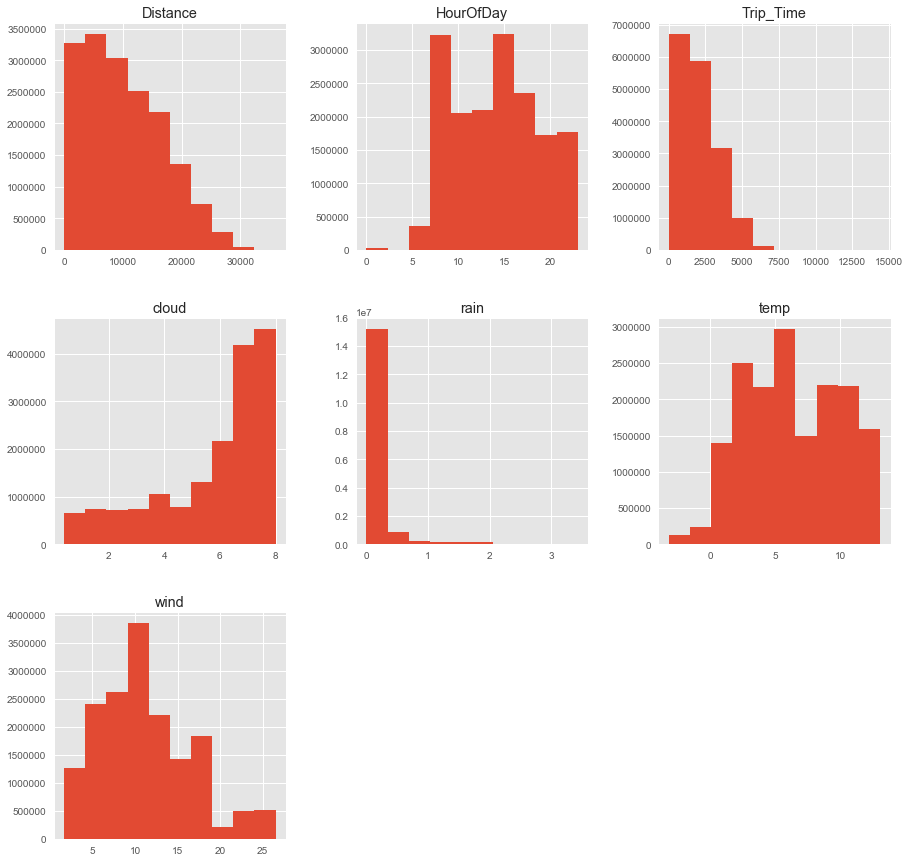

In [68]:
continuous_columns = df[continuous_features].columns
df[continuous_columns].hist(figsize=(15, 15))
plt.savefig('histograms_all_data_v1.jpg')

## Analysis: 
### One key quality issue to note is that in the previously run data quality report the histograms for the derived features indicated that we had data quality issues with those features (that outliers were present). This should not be the case with derived features. After some refactoring, and debugging, we have resolved these issues, as can be seen from the above where the exponential distribution for the two derived features Trip_Time and Distance are more what one would expect for such a feature and do not indicate any data quality issues. 

## Plot Box Plots for all Continuous Features

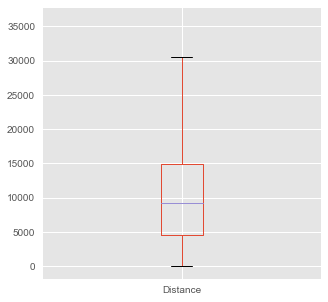

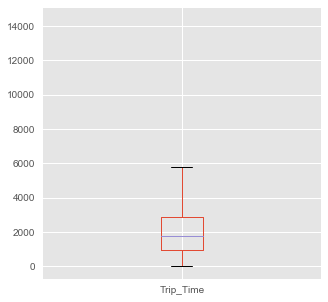

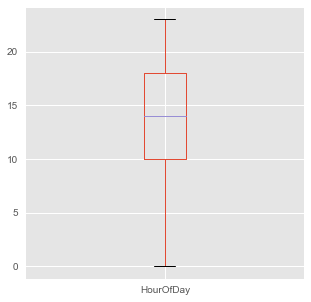

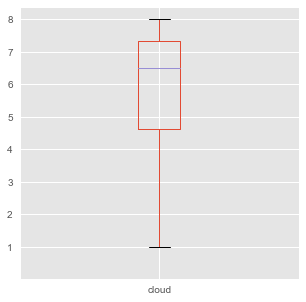

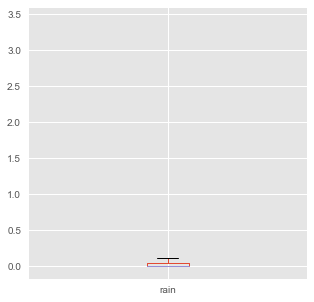

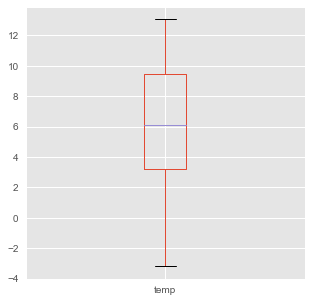

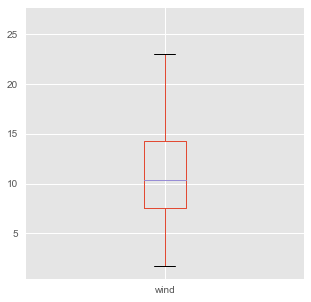

In [69]:
%matplotlib inline

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(5, 5))
    plt.savefig(col + '_boxplot_all_data_v1.jpg')
    plt.show()

## Plot Bar Plots for all the Categorical Features

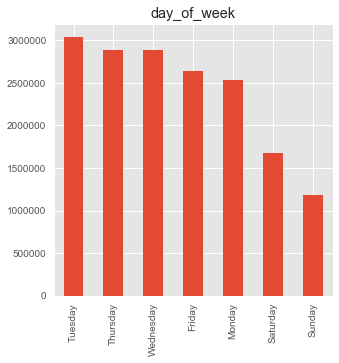

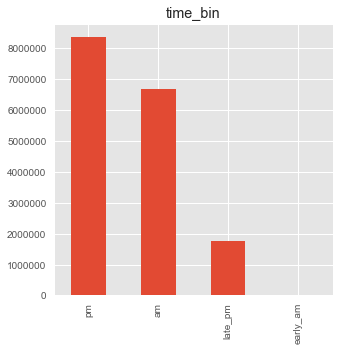

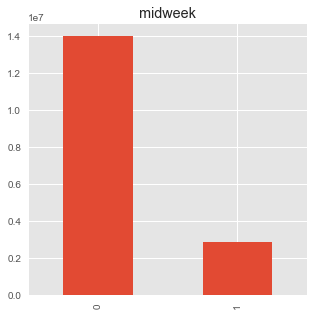

In [70]:
%matplotlib inline
# due to the high cardinality of stop_id, journey_pattern_id and vehicle_journey_id it is of no benefit to plot them here
categorical_features_plotting = ['day_of_week', 'time_bin', 'midweek']
categorical_columns_plotting = df[categorical_features_plotting].columns

for column in categorical_columns_plotting:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(5, 5))
    plt.savefig(column + '_barplot_all_data_v1.jpg')
    plt.show()

## Data Quality Issues

### Continuous Features

## Issue 1: 
### Trip Time: Max Value is 23hours - must be an error (invalid data because this is a derived feature) - Can confirm this has been fixed through further data cleaning. 
### Distance Terminal: Max Value is 318km - must be an error (invalid data because this is a derived feature) - Can confirm this has been fixed through further data cleaning. 

## Data Understanding

### Print the correlations between the continuous features

In [71]:
sns.set(style='white')
corr = df[continuous_features].corr()
print(corr)

           Distance  Trip_Time  HourOfDay     cloud      rain      temp  \
Distance   1.000000   0.893826   0.052475 -0.000260 -0.001314  0.001885   
Trip_Time  0.893826   1.000000   0.030765 -0.004441  0.004250  0.019728   
HourOfDay  0.052475   0.030765   1.000000 -0.035113 -0.000363  0.041092   
cloud     -0.000260  -0.004441  -0.035113  1.000000  0.303475  0.324795   
rain      -0.001314   0.004250  -0.000363  0.303475  1.000000 -0.079119   
temp       0.001885   0.019728   0.041092  0.324795 -0.079119  1.000000   
wind       0.004749   0.009363   0.057830  0.160337  0.239661  0.395017   

               wind  
Distance   0.004749  
Trip_Time  0.009363  
HourOfDay  0.057830  
cloud      0.160337  
rain       0.239661  
temp       0.395017  
wind       1.000000  


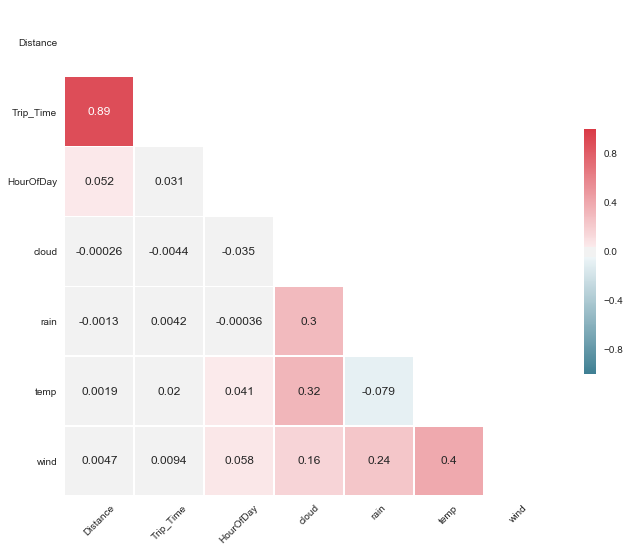

In [72]:
# a nicer representation of correlations 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colour map - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
           square=True, xticklabels=True, yticklabels=True,
           linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.savefig('feature_correlations_all_data_v1.png')

## Analysis: 
### We can see from the above that the descriptive feature with the highest correlation to trip_time is distance. After this hour of the day is the next most relevant although to a much lesser extent here.  

## Plot the scatter plots of each pair of continuous descriptive features and target feature

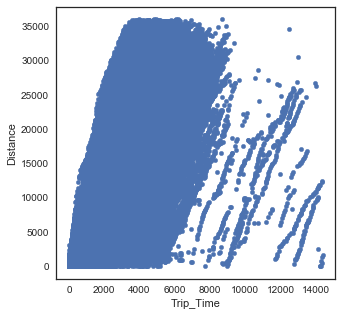

In [73]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='Distance',  figsize=(5, 5))
plt.savefig('trip_time_distance_relationship_all_data_v1.png')

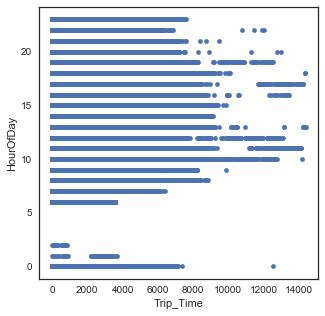

In [74]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='HourOfDay', figsize=(5, 5))
plt.savefig("trip_time_hour_relationship_all_data_v1.png")

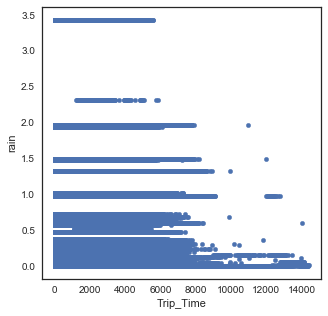

In [75]:
% matplotlib inline 
df.plot(kind='scatter', x='Trip_Time', y='rain', figsize=(5, 5))
plt.savefig("trip_time_rain_relationship_all_data_v1.png")

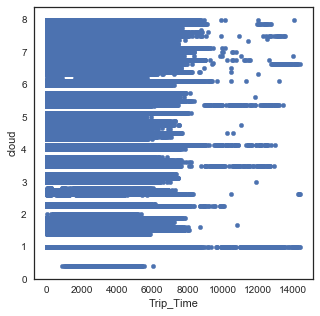

In [76]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='cloud', figsize=(5, 5))
plt.savefig("trip_time_cloud_relationship_all_data_v1.png")

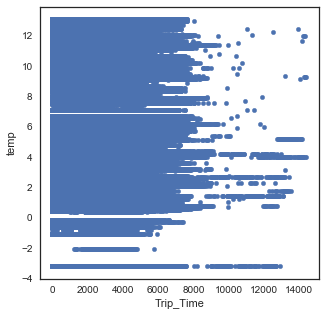

In [77]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='temp', figsize=(5, 5))
plt.savefig("trip_time_temp_relationship_all_data_v1.png")

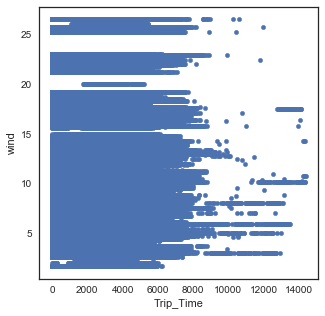

In [42]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='wind', figsize=(5, 5))
plt.savefig("trip_time_wind_relationship_all_data_v1.png")

## Analysis: 
### From the above scatter plots we can see:
### 1. That we still have some outliers present - whether these are valid or not should be determined. 
### 2. That we still have some issues with time/distance because we have values of 0 for time where distance is greater than 0. This doesn't make sense and should be investigated and rectified. One possible cause is that the GPS data is only accurate to within 30 meters. 

## For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots)

In [78]:
print(categorical_features)

['Journey_Pattern_ID', 'day_of_week', 'midweek', 'time_bin']


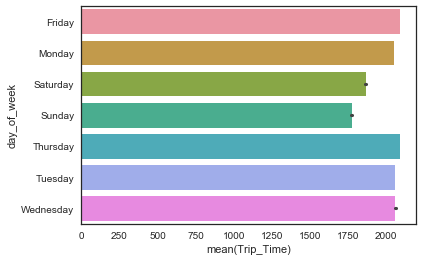

In [80]:
sns.barplot(x="Trip_Time", y="day_of_week", data=df)
plt.savefig("trip_time_day_relationship_all_data_v1.png")

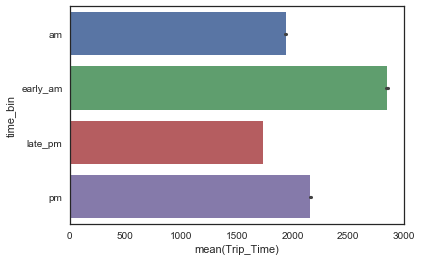

In [45]:
sns.barplot(x="Trip_Time", y="time_bin", data=df)
plt.savefig("trip_time_time_bin_relationship_all_data_v1.png")

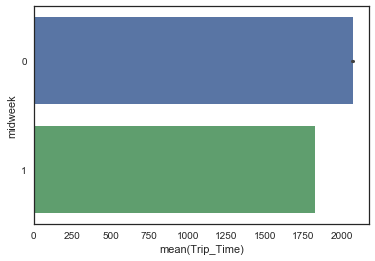

In [46]:
sns.barplot(x="Trip_Time", y="midweek", data=df)
plt.savefig("trip_time_midweek_relationship_all_data_v1.png")

## Analysis: 
### 1. What the above bar plots tell us is that Monday to Friday have higher mean trip_times than Saturday and Sunday - something that we would expect to see and is a good indication that the trend of our derived features is accurate. 
### 2. We can also see that the mean trip_time is highest in the time_bins of early am and pm - this again is what we would expect as these time_bins contain the two rush hour periods in the day. 